In [7]:
import mnist
import numpy
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from PIL import Image

In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [4]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [5]:
train_images_flat = train_images.reshape(60000, -1)
test_images_flat = test_images.reshape(10000, -1)

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)

In [12]:
mlp.fit(train_images_flat, train_labels)

Iteration 1, loss = 2.78019142
Iteration 2, loss = 2.05969770
Iteration 3, loss = 1.82960811
Iteration 4, loss = 1.68367209
Iteration 5, loss = 1.46452880
Iteration 6, loss = 1.38439245
Iteration 7, loss = 1.33922100
Iteration 8, loss = 1.31723523
Iteration 9, loss = 1.29929849
Iteration 10, loss = 1.28375184
Iteration 11, loss = 1.27025829
Iteration 12, loss = 1.26098041
Iteration 13, loss = 1.24085598
Iteration 14, loss = 1.20931301
Iteration 15, loss = 1.15650560
Iteration 16, loss = 1.09870707
Iteration 17, loss = 1.01815804
Iteration 18, loss = 0.94477043
Iteration 19, loss = 0.90262646
Iteration 20, loss = 0.87679066
Iteration 21, loss = 0.85873730
Iteration 22, loss = 0.84404978
Iteration 23, loss = 0.83435128
Iteration 24, loss = 0.82334881
Iteration 25, loss = 0.81625669
Iteration 26, loss = 0.81164930
Iteration 27, loss = 0.80002751
Iteration 28, loss = 0.78605743
Iteration 29, loss = 0.76417313
Iteration 30, loss = 0.74741170
Iteration 31, loss = 0.73913900
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [15]:
n = 0
mlp.predict([test_images_flat[n]])

array([7], dtype=uint8)

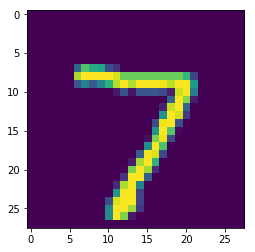

In [17]:
plt.imshow(test_images[n])

In [40]:
image = numpy.array(Image.open("mnist_test/0.bmp"))[:, :, 0].ravel()
mlp.predict([image])

array([0], dtype=uint8)

In [41]:
mlp.score(test_images_flat, test_labels)

0.8768